In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

In [4]:
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [5]:
mean_ = sum(x) / len(x)
mean_

8.7

In [6]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [7]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [20]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [9]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [10]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [11]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [12]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [13]:
scipy.stats.gmean(y)

4.67788567485604

In [14]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [22]:
statistics.median_low(x[:-1])

2.5

In [16]:
x

[8.0, 1, 2.5, 4, 28.0]

In [23]:
u = [2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [24]:
mode_ = statistics.mode(u)
mode_

2

In [25]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [26]:
var_ = statistics.variance(x)
var_

123.2

In [27]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [30]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [31]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [32]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [37]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [41]:
y = np.array(x)
np.percentile(y, 5)
np.percentile(y, 80)

22.92

In [43]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

In [46]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [47]:
r, p = scipy.stats.pearsonr(x_, y_)

In [48]:
p

5.122760847201171e-07

In [49]:
corr_matrix = np.corrcoef(x_, y_)
>>> corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [50]:
a = np.array([[1, 1, 1],
...               [2, 3, 1],
...               [4, 9, 2],
...               [8, 27, 4],
...               [16, 1, 1]])

In [64]:
np.median(a, axis=0)

array([4., 3., 1.])

In [55]:
a.var(ddof=4)

67.96363636363638

In [66]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [70]:
df['A'].mean()

6.2

In [71]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [73]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [78]:
np.random.seed(seed=0)
>>> x = np.random.randn(1000)
>>> y = np.random.randn(100)
>>> z = np.random.randn(10)

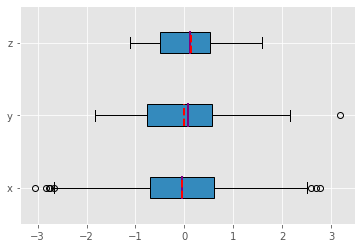

In [76]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
labels=('x', 'y', 'z'), patch_artist=True,
medianprops={'linewidth': 2, 'color': 'purple'},
meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

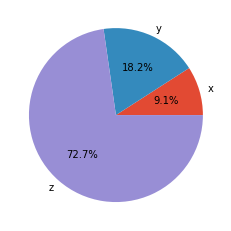

In [79]:
x, y, z = 128, 256, 1024
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

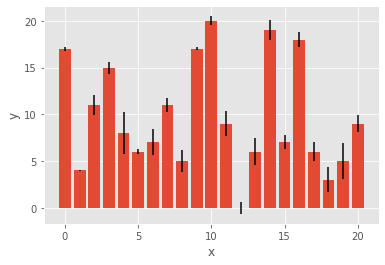

In [85]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

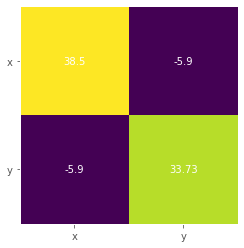

In [92]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

In [93]:
import seaborn as sns

<AxesSubplot:>

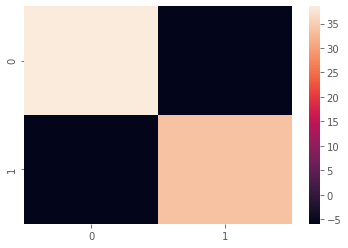

In [94]:
sns.heatmap(matrix)

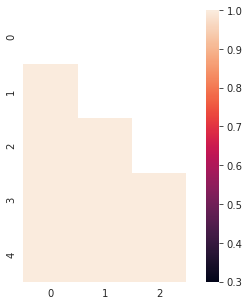

In [98]:
mask = np.zeros_like(a)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(a, mask=mask, vmax=.3, square=True)